<div style='background-image: url("../share/baku.jpg") ; padding: 0px ; background-size: cover ; border-radius: 15px ; height: 250px; background-position: 0% 80%'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.9) ; line-height: 100%">ObsPy Tutorial</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.7)">Handling Event Metadata</div>
        </div>
    </div>
</div>
image: User:Abbaszade656 / Wikimedia Commons / <a href="http://creativecommons.org/licenses/by-sa/4.0/">CC-BY-SA-4.0</a>

## Workshop for the "Training in Network Management Systems and Analytical Tools for Seismic"
### Baku, October 2018

Seismo-Live: http://seismo-live.org

##### Authors:
* Lion Krischer ([@krischer](https://github.com/krischer))
* Tobias Megies ([@megies](https://github.com/megies))
---

![](images/obspy_logo_full_524x179px.png)

In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8

- for event metadata, the de-facto standard is [QuakeML (an xml document structure)](https://quake.ethz.ch/quakeml/)
- QuakeML files can be read using **`read_events()`**

In [2]:
import obspy

catalog = obspy.read_events("./data/south_napa_with_some_aftershocks.xml")
print(catalog)

5 Event(s) in Catalog:
2014-08-24T12:47:12.550000Z | +38.238, -122.343 | 3.6 mw | manual
2014-08-24T10:24:44.240000Z | +38.260, -122.337 | 3.51 ml | manual
2014-08-24T10:21:45.440000Z | +38.235, -122.320 | 3.81 ml | manual
2014-08-24T10:21:10.840000Z | +38.760, -122.726 | 4.38 md | manual
2014-08-24T10:20:44.070000Z | +38.215, -122.312 | 6.02 mw | manual


- **`read_events()`** function returns a **`Catalog`** object, which is
a collection of **`Event`** objects.

In [3]:
print(type(catalog))
print(type(catalog[0]))

<class 'obspy.core.event.catalog.Catalog'>
<class 'obspy.core.event.event.Event'>


In [4]:
event = catalog[0]
print(event)

Event:	2014-08-24T12:47:12.550000Z | +38.238, -122.343 | 3.6 mw | manual

	            resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/fdsnws/event/1/query?eventid=nc72283201&format=quakeml")
	             event_type: 'earthquake'
	          creation_info: CreationInfo(agency_id='nc', creation_time=UTCDateTime(2017, 3, 17, 23, 18, 51, 71000), version='9')
	    preferred_origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/nc72283201/nc/1486208787950/product.xml")
	 preferred_magnitude_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/nc72283201/nc/1486208787950/product.xml#magnitude")
	                   ---------
	     event_descriptions: 1 Elements
	                origins: 1 Elements
	             magnitudes: 1 Elements


- Event objects are again collections of other resources.
- the nested ObsPy Event class structure (Catalog/Event/Origin/Magnitude/FocalMechanism/...) is closely modelled after QuakeML
<img src="images/Event.svg" width=90%>

In [5]:
print(type(event.origins))
print(type(event.origins[0]))
print(event.origins[0])

<class 'list'>
<class 'obspy.core.event.origin.Origin'>
Origin
	        resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/nc72283201/nc/1486208787950/product.xml")
	               time: UTCDateTime(2014, 8, 24, 12, 47, 12, 550000)
	          longitude: -122.3425
	           latitude: 38.2383333
	              depth: 8439.0 [uncertainty=190.0]
	            quality: OriginQuality(used_phase_count=302, used_station_count=279, standard_error=0.18, azimuthal_gap=21.0, minimum_distance=0.02432)
	 origin_uncertainty: OriginUncertainty(horizontal_uncertainty=90.0, preferred_description='horizontal uncertainty')
	    evaluation_mode: 'manual'
	      creation_info: CreationInfo(agency_id='NC', creation_time=UTCDateTime(2017, 2, 4, 11, 46, 27, 950000), version='9')


In [6]:
print(type(event.magnitudes))
print(type(event.magnitudes[0]))
print(event.magnitudes[0])

<class 'list'>
<class 'obspy.core.event.magnitude.Magnitude'>
Magnitude
	     resource_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/nc72283201/nc/1486208787950/product.xml#magnitude")
	             mag: 3.6
	  magnitude_type: 'mw'
	       origin_id: ResourceIdentifier(id="quakeml:earthquake.usgs.gov/archive/product/origin/nc72283201/nc/1486208787950/product.xml")
	   station_count: 3
	 evaluation_mode: 'manual'
	   creation_info: CreationInfo(agency_id='NC', creation_time=UTCDateTime(2017, 2, 4, 11, 46, 27, 950000))


In [7]:
# try event.<Tab> to get an idea what "children" elements event has

- The Catalog object contains some convenience methods to make
working with events easier.
- for example, the included events can be filtered with various keys.

In [8]:
largest_magnitude_events = catalog.filter("magnitude >= 4.0")
print(largest_magnitude_events)

2 Event(s) in Catalog:
2014-08-24T10:21:10.840000Z | +38.760, -122.726 | 4.38 md | manual
2014-08-24T10:20:44.070000Z | +38.215, -122.312 | 6.02 mw | manual


- There is a basic preview plot using the matplotlib basemap module.

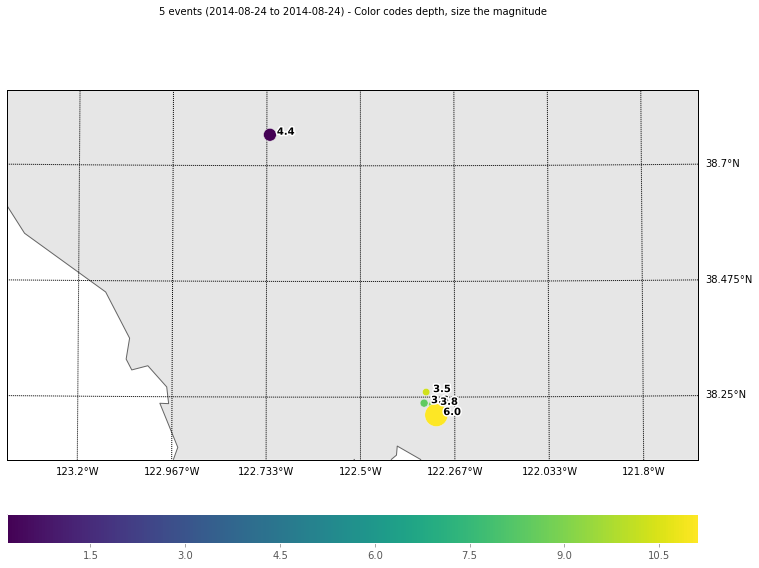

In [9]:
catalog.plot(projection="local", resolution="i", label="magnitude");

- a (modified) Catalog can be output to file in a number of different formats.

In [10]:
largest_magnitude_events.write("/tmp/large_events.xml", format="QUAKEML")
!ls -l /tmp/large_events.xml

-rw-r--r--  1 lion  wheel  5821 Sep 14 23:49 /tmp/large_events.xml


- the event type classes can be used to build up Events/Catalogs/Picks/.. from scratch in custom processing work flows and to share them with other researchers in the de facto standard format QuakeML

In [11]:
from obspy import UTCDateTime
from obspy.core.event import Catalog, Event, Origin, Magnitude
from obspy.geodetics import FlinnEngdahl

cat = Catalog()
cat.description = "Just a fictitious toy example catalog built from scratch"

e = Event()
e.event_type = "not existing"

o = Origin()
o.time = UTCDateTime(2014, 2, 23, 18, 0, 0)
o.latitude = 47.6
o.longitude = 12.0
o.depth = 10000
o.depth_type = "operator assigned"
o.evaluation_mode = "manual"
o.evaluation_status = "preliminary"
o.region = FlinnEngdahl().get_region(o.longitude, o.latitude)

m = Magnitude()
m.mag = 7.2
m.magnitude_type = "Mw"

m2 = Magnitude()
m2.mag = 7.4
m2.magnitude_type = "Ms"

# also included could be: custom picks, amplitude measurements, station magnitudes,
# focal mechanisms, moment tensors, ...

# make associations, put everything together
cat.append(e)
e.origins = [o]
e.magnitudes = [m, m2]
m.origin_id = o.resource_id
m2.origin_id = o.resource_id

print(cat)
cat.write("/tmp/my_custom_events.xml", format="QUAKEML")
!cat /tmp/my_custom_events.xml

1 Event(s) in Catalog:
2014-02-23T18:00:00.000000Z | +47.600,  +12.000 | 7.2 Mw | manual
<?xml version='1.0' encoding='utf-8'?>
<q:quakeml xmlns:q="http://quakeml.org/xmlns/quakeml/1.2" xmlns="http://quakeml.org/xmlns/bed/1.2">
  <eventParameters publicID="smi:local/baf46365-7860-4575-b703-b0345336f463">
    <description>Just a fictitious toy example catalog built from scratch</description>
    <event publicID="smi:local/a7ef8a35-4bf5-487b-9d2c-edc9016b5e52">
      <type>not existing</type>
      <origin publicID="smi:local/b8b23385-f10c-4240-bfe0-26df9887f9b3">
        <time>
          <value>2014-02-23T18:00:00.000000Z</value>
        </time>
        <latitude>
          <value>47.6</value>
        </latitude>
        <longitude>
          <value>12.0</value>
        </longitude>
        <depth>
          <value>10000.0</value>
        </depth>
        <depthType>operator assigned</depthType>
        <region>AUSTRIA</region>
        <evaluationMode>manual</evaluationMode>
        <ev